In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quant_met import hamiltonians, plotting

In [2]:
# Define all parameters
a_0 = 1
a = np.sqrt(3) * a_0  # lattice constant (to have a_0 as energy scale)
n = 10000  # number of points across the whole k space path
t_gr = 1  # hopping Graphene
t_x = 0.01  # hopping impurity

In [3]:
Gamma = np.array([0, 0])
M = np.pi / a * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * a) * np.array([1, 0])

all_K_points = 4 * np.pi / (3 * a) * np.array([
    (np.sin(i * np.pi/6), np.cos(i * np.pi/6)) for i in [1, 3, 5, 7, 9, 11]]
)

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=n)

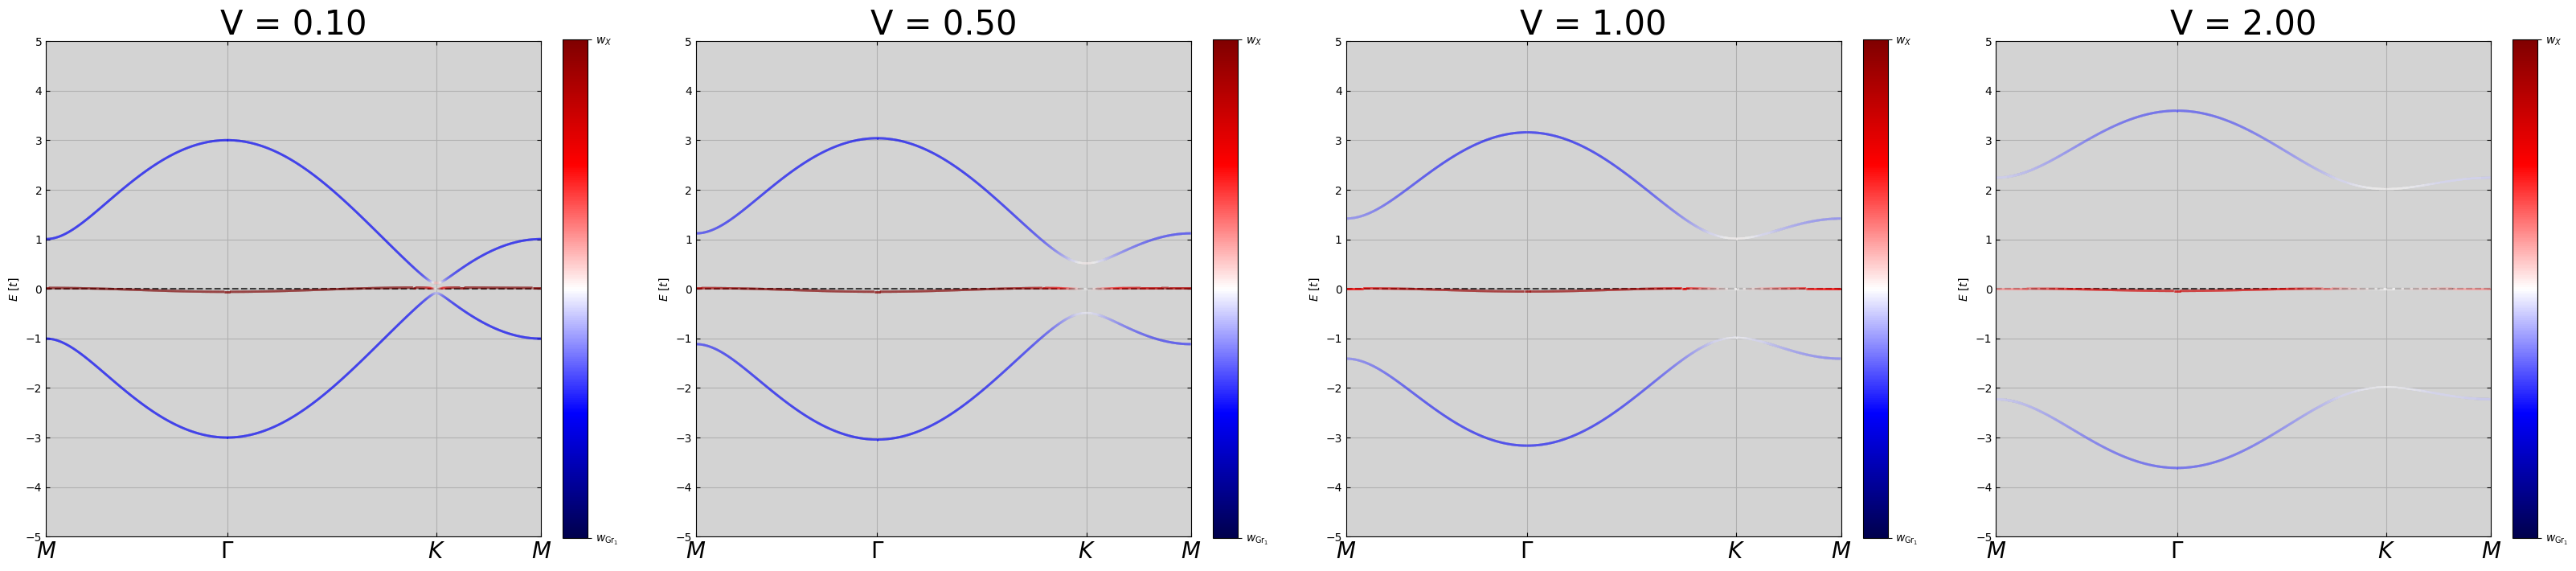

In [18]:
import matplotlib
matplotlib.style.use('default')

V_list = [0.1, 0.5, 1, 2]

fig, axs = plt.subplots(nrows=1, ncols=len(V_list), figsize=(len(V_list) * 10, 10))


for V, ax in zip(V_list, axs):
    egx_h = hamiltonians.EGXHamiltonian(t_gr=t_gr, t_x=t_x, a=a, mu=0, V=V, U_gr=0, U_x=0)
    
    band_structure = egx_h.calculate_bandstructure(band_path, overlaps=np.array([[0, 0, 1], [1, 0, 0]]))
    
    bands = band_structure[['band_0', 'band_1', 'band_2']]
    overlaps = band_structure[['wx_0', 'wx_1', 'wx_2']]
    
    plotting.plot_bandstructure(bands=bands.to_numpy().T, overlaps=overlaps.to_numpy().T, k_point_list=band_path_plot, ticks=ticks, labels=labels, ax_in=ax, fig_in=fig, overlap_labels=[r"$w_{\mathrm{Gr}_1}$", r"$w_X$"])
    
    ax.set_title(f'V = {V:.2f}', fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    
fig.savefig('EG-X bands.pdf', bbox_inches='tight')